<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/axis_minor_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

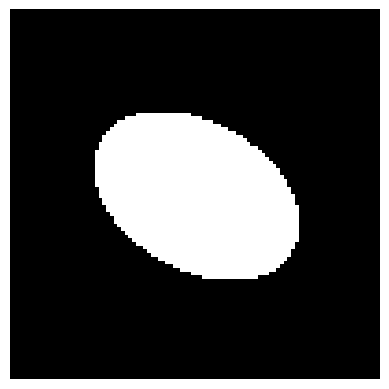

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse

# Define ellipse parameters
image1_shape = (100, 100)  # Shape of the image
center = (50, 50)          # Center of the ellipse
r_row = 30                 # Semi-axis length along rows
r_col = 20                 # Semi-axis length along columns
rotation_angle = np.deg2rad(60)  # Rotation angle in radians

# Create a blank image
image1 = np.zeros(image1_shape, dtype=np.uint8)

# Draw the rotated ellipse on the image
rr, cc = ellipse(center[0], center[1], r_row, r_col, rotation=rotation_angle)
image1[rr, cc] = 255  # Set the pixel values to 255 (white)

# Display the image
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

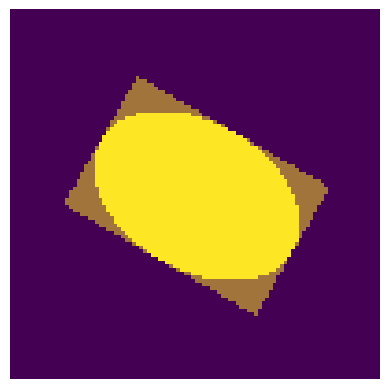

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Function to rotate a point (px, py) around another point (cx, cy) by angle theta
def rotate_point(px, py, cx, cy, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rx = cos_theta * (px - cx) - sin_theta * (py - cy) + cx
    ry = sin_theta * (px - cx) + cos_theta * (py - cy) + cy
    return rx, ry

# Create a sample image
image = np.zeros((100, 100), dtype=np.uint8)

# Define rectangle parameters
cx, cy = 50, 50   # Center of the rectangle
width, height = 60, 40  # Width and height of the rectangle
rotation_angle = np.deg2rad(30)  # Rotation angle in radians

# Calculate the corners of the rectangle
corners = np.array([[-width/2, -height/2],
                    [width/2, -height/2],
                    [width/2, height/2],
                    [-width/2, height/2]])

# Rotate the corners
rotated_corners = np.array([rotate_point(x, y, 0, 0, rotation_angle) for x, y in corners])

# Translate the rotated corners to the center of the rectangle
rotated_corners[:, 0] += cx
rotated_corners[:, 1] += cy

# Draw the rotated rectangle on the image
rr, cc = polygon(rotated_corners[:, 1], rotated_corners[:, 0], image.shape)
image[rr, cc] = 128

# Display the image with the rotated rectangle
plt.imshow(image)
plt.axis('off')
plt.imshow(image1,alpha=0.5)
plt.show()

In [28]:
from skimage import filters,measure
test = image > 1
test = measure.label(test)
props = measure.regionprops_table(test,properties=(
    'area','axis_minor_length','axis_major_length'
))

In [29]:
print(props['axis_minor_length'])
print(props['axis_major_length'])

[46.21042263]
[69.29973113]
